<a href="https://colab.research.google.com/github/Hallymhwangbo/2020-AI_minseo/blob/master/03_1_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression 이해하기 : 매우 중요

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x_train = [1, 2, 3]

In [4]:
y_train = [2+1-0.4, 4+1+0.3, 6+1-0.14]

Text(0, 0.5, 'Y')

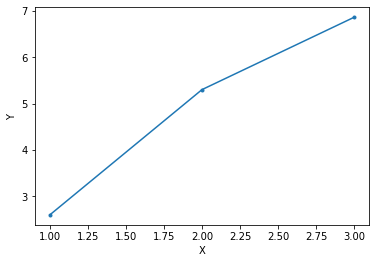

In [5]:
plt.plot(x_train, y_train,'.-')
plt.xlabel('X')
plt.ylabel('Y')

y = 2x + 1


y = wx + b

## 초기화, Initialization

In [6]:
w0 = 100; #바꾸기
b0 = -100; #바꾸기

## Parameter 설정

In [7]:
w = tf.Variable(w0*tf.ones([1]), name='weight')
b = tf.Variable(b0*tf.ones([1]), name='bias')

## Our hypothesis XW+b

In [8]:
hypothesis = x_train * w + b

## cost/loss function

In [9]:
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

## Optimizer 설정

In [10]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

## Launch the graph in a session

In [11]:
sess = tf.Session()

## Initializes global variables in the graph

In [12]:
sess.run(tf.global_variables_initializer())

## Run

In [13]:
nb_epoch = 4000

In [14]:
vw = [] #empty list
vb = []
vcost = []

In [15]:
for step in range(nb_epoch+1):
  sess.run(train)
  w1 = sess.run(w)[0] # slope
  b1  = sess.run(b)[0] # bias
  cost1 = sess.run(cost)
  vw.append(w1)
  vb.append(b1)
  vcost.append(cost1)
  if step % 50 == 0: # 50번마다 결과 출력
    print(step, '--', cost1, '--', w1, '--', b1)

0 -- 12619.296 -- 94.89187 -- -101.9016
50 -- 1627.353 -- 49.0924 -- -105.79356
100 -- 1279.1984 -- 43.66899 -- -93.76704
150 -- 1005.5817 -- 38.958935 -- -83.06081
200 -- 790.49414 -- 34.783184 -- -73.56835
250 -- 621.4158 -- 31.08089 -- -65.15217
300 -- 488.5048 -- 27.79837 -- -57.690235
350 -- 384.02475 -- 24.888033 -- -51.074356
400 -- 301.89392 -- 22.307678 -- -45.208607
450 -- 237.33153 -- 20.019888 -- -40.00792
500 -- 186.57965 -- 17.991493 -- -35.3969
550 -- 146.68407 -- 16.193083 -- -31.308693
600 -- 115.32245 -- 14.598578 -- -27.684008
650 -- 90.66941 -- 13.184862 -- -24.4703
700 -- 71.28987 -- 11.931438 -- -21.620974
750 -- 56.055805 -- 10.820131 -- -19.094711
800 -- 44.080418 -- 9.834826 -- -16.854883
850 -- 34.666676 -- 8.961237 -- -14.869008
900 -- 27.266623 -- 8.186697 -- -13.108297
950 -- 21.4495 -- 7.4999766 -- -11.547219
1000 -- 16.87671 -- 6.8911176 -- -10.163138
1050 -- 13.282069 -- 6.3512907 -- -8.935986
1100 -- 10.456365 -- 5.872672 -- -7.8479733
1150 -- 8.235105 

In [16]:
w1 = sess.run(w)[0] # slope
b1 = sess.run(b)[0] # bias
str1 = 'y={:.3}x + {:.3}'.format(w1, b1)
print(w1, b1)
print(str1)

2.1334834 0.65208215
y=2.13x + 0.652


Text(0.5, 1.0, 'y=2.13x + 0.652')

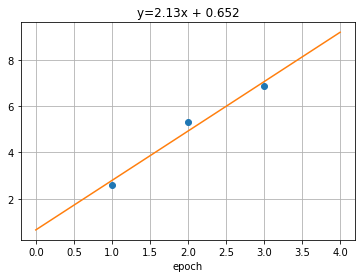

In [17]:
plt.figure(1)
plt.plot(x_train, y_train,'o')
x1 = np.min(x_train)-1, np.max(x_train)+1
y1 = np.dot(w1,x1) + b1
plt.plot(x1, y1)
plt.grid()
plt.xlabel('epoch')
plt.title(str1)

Text(0.5, 0, 'epoch')

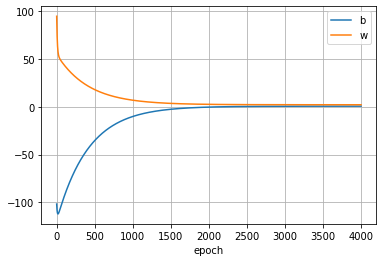

In [18]:
plt.plot(vb)
plt.plot(vw)
plt.legend(['b', 'w'])
plt.grid()
plt.xlabel('epoch')

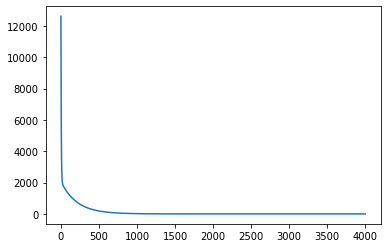

In [19]:
plt.plot(vcost)